In [27]:
import numpy                as np
import matplotlib.pyplot    as plt
from astropy import units   as units
import sys
from pathlib            import Path
from matplotlib         import rcParams, rc
from scipy.interpolate  import interp1d
# Change the matplotlib default parameters
rcParams.update({'font.size':   8})
rcParams.update({'figure.dpi': 120})

sys.path.append('/lhome/silkem/ChemTorch/ChemTorch/')
from read               import read_data_chemtorch
# from src.rates          import *
from solve_n_save       import solve
from src.input          import density

rate = 16

outloc = '/lhome/silkem/ChemTorch/ChemTorch/out/'

In [ ]:
# opslaan als np.array() via np.save(array,naam) & np.load(naam)

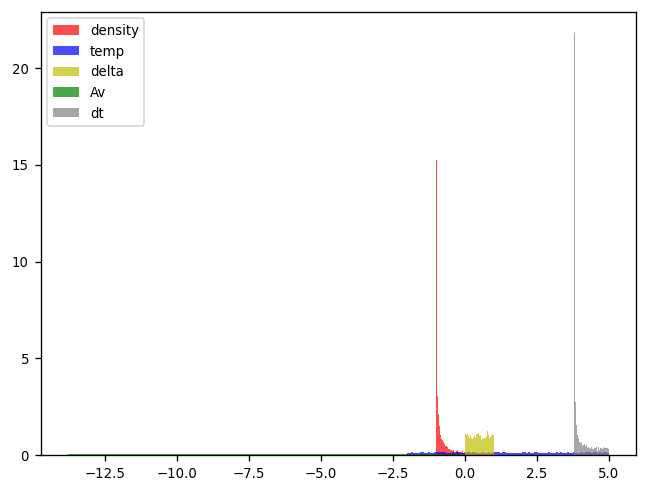

In [93]:
### !!! HIER VERONDERSTELLEN WE ONGECORRELEERDE PARAMETERS

nstep = 512

def dens(x):
	return 1./(x+1.001)

def temp(x):
	return np.ones_like(x)

def delta(x):
	return np.ones_like(x)

def Av(x):
	return np.ones_like(x)

def dt(x):
	return x**3./(-1.+np.exp(-x+3.8001))

## cummulative sum 
## generate random numbers between [0,1)
## Define a function to return N samples
def genSamples(xmin, xmax, nstep, N, f):
	xbin = np.linspace(xmin, xmax, nstep)
	ycum = np.cumsum(f(xbin))
	u = np.random.uniform(ycum.min(), ycum.max(), int(N))
    ## take the inverse of cumm. function
	func_interp = interp1d(ycum, xbin)
	samples = func_interp(u)
	return samples

dens_min = -1.
dens_max = 1.
temp_min = -2.
temp_max = 5
delt_min = 1.e-6
delt_max = 1
Av_min = np.log(delt_min)
Av_max = np.log(delt_max)
dt_min = 3.8
dt_max = 5.

samples = 1.e4

dens_samples = genSamples(dens_min, dens_max, nstep, samples, dens)
temp_samples = genSamples(temp_min, temp_max, nstep, samples, temp)
delt_samples = genSamples(delt_min, delt_max, nstep, samples, delta)
Av_samples = genSamples(Av_min, Av_max, nstep, samples, Av)
dt_samples = genSamples(dt_min, dt_max, nstep, samples, dt)

plt.hist(dens_samples,bins=100, density=True, color='r', alpha=0.7, label = 'density')
plt.hist(temp_samples,bins=100, density=True, color='b', alpha=0.7, label = 'temp')
plt.hist(delt_samples,bins=100, density=True, color='y', alpha=0.7, label = 'delta')
plt.hist(Av_samples,bins=100, density=True, color='g', alpha=0.7, label = 'Av')
plt.hist(dt_samples,bins=100, density=True, color='grey', alpha=0.7, label = 'dt')

plt.legend()
plt.show()

In [ ]:
# elke run eigen map, uniek, date ofzo
# checken op andere computer dat wanneer ge random seeds maakt, dat de random getallen effectief anders zijn
# nu enkel variaties van variabelen, begin met een gekozen input
# starten van de chemie waar ge mee eindigd --> paden in de fysiochemische ruimte
# eind abundantie terug meegeven, niet initialiseren